In [1]:
library("GenomicDistributions")
queryFile = system.file("extdata", "vistaEnhancers.bed.gz", package="GenomicDistributions")
query = rtracklayer::import(queryFile)

Loading required package: IRanges

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: GenomicRanges

Loading required package: GenomeInfoDb



In [2]:
query

GRanges object with 1339 ranges and 0 metadata columns:
         seqnames              ranges strand
            <Rle>           <IRanges>  <Rle>
     [1]     chr1     3190582-3191428      *
     [2]     chr1     8130440-8131887      *
     [3]     chr1   10593124-10594209      *
     [4]     chr1   10732071-10733118      *
     [5]     chr1   10757665-10758631      *
     ...      ...                 ...    ...
  [1335]     chrX 139380917-139382199      *
  [1336]     chrX 139593503-139594774      *
  [1337]     chrX 139674500-139675403      *
  [1338]     chrX 147829017-147830159      *
  [1339]     chrX 150407693-150409052      *
  -------
  seqinfo: 23 sequences from an unspecified genome; no seqlengths

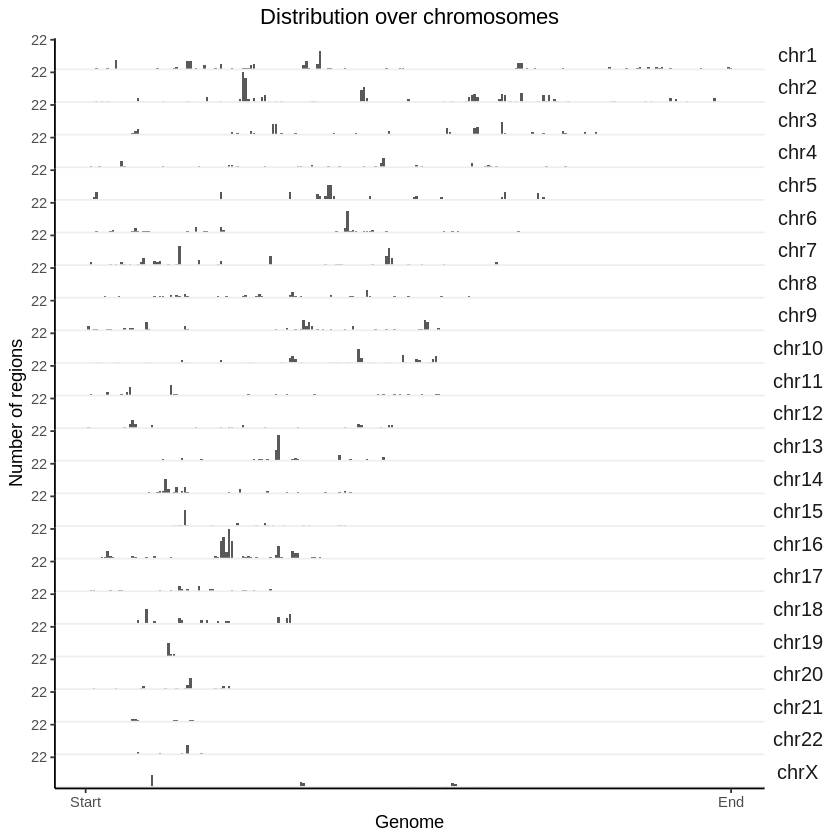

In [3]:
# First, calculate the distribution:
x = calcChromBinsRef(query, "hg19")

# Then, plot the result:
plotChromBins(x)

Warning message:
“Removed 4 rows containing missing values (geom_bar).”


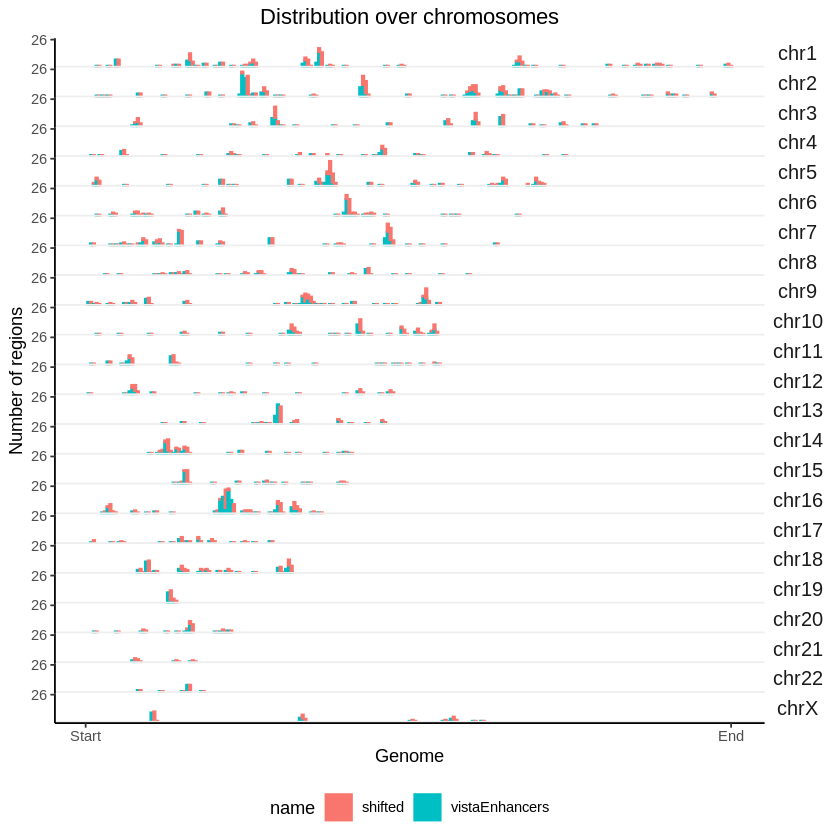

In [4]:
# Let's fudge a second region set by shifting the first one over 
query2 = GenomicRanges::shift(query, 1e6)
queryList = GRangesList(vistaEnhancers=query, shifted=query2)
x2 = calcChromBinsRef(queryList, "hg19")
plotChromBins(x2)

In [6]:
# Calculate the distances:
TSSdist = calcFeatureDistRefTSS(query, "hg19")
class(TSSdist)

[1] "numeric"

In [8]:
length(query)

[1] 1339

In [7]:
length(TSSdist)

[1] 1339

In [10]:
calcFeatureDistRefTSS

function (query, refAssembly) 
{
    features = getTSSs(refAssembly)
    return(calcFeatureDist(query, features))
}
<bytecode: 0x564d2d11a720>
<environment: namespace:GenomicDistributions>

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.



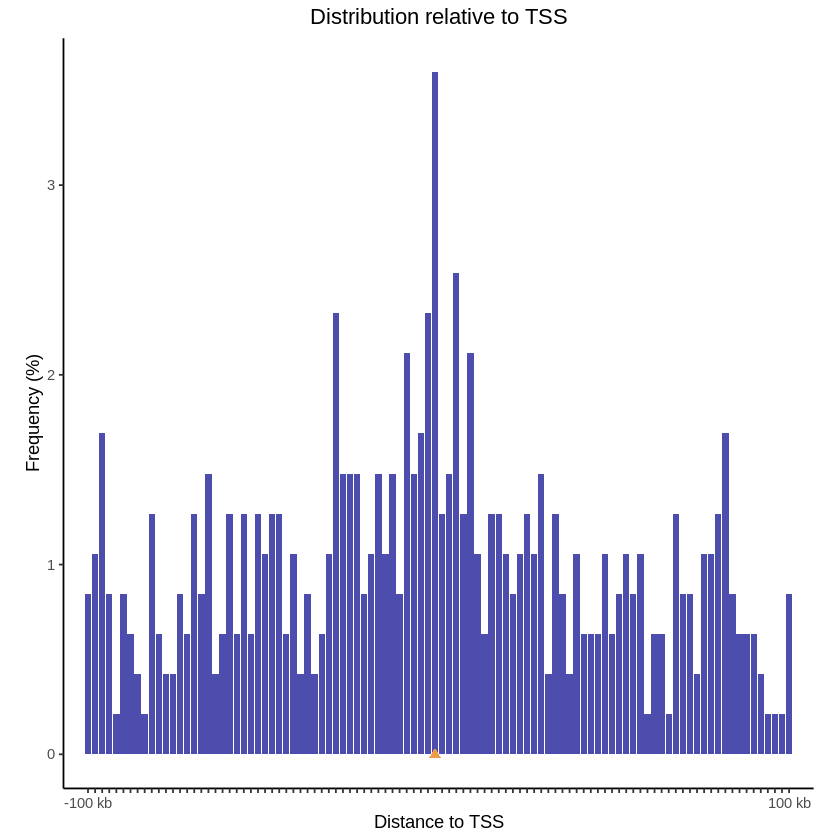

In [11]:
# Then plot the result:
plotFeatureDist(TSSdist, featureName="TSS")

Calculating overlaps...



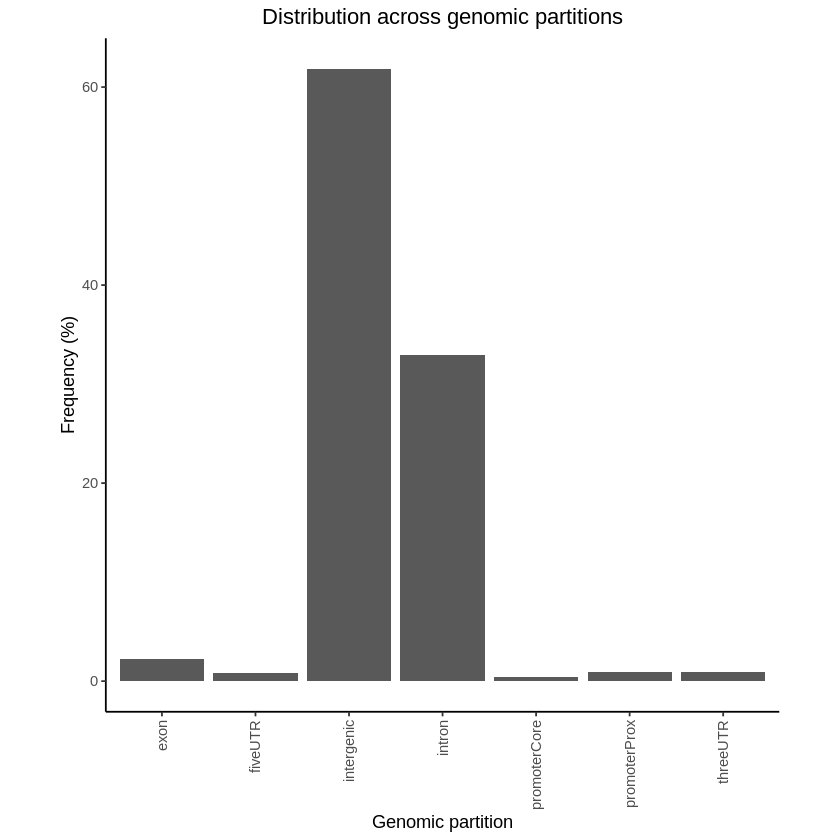

In [12]:
gp = calcPartitionsRef(query, "hg19")
plotPartitions(gp)

In [13]:
gp

partition,Freq
<fct>,<int>
exon,30
fiveUTR,11
intergenic,828
intron,441
promoterCore,5
promoterProx,12
threeUTR,12


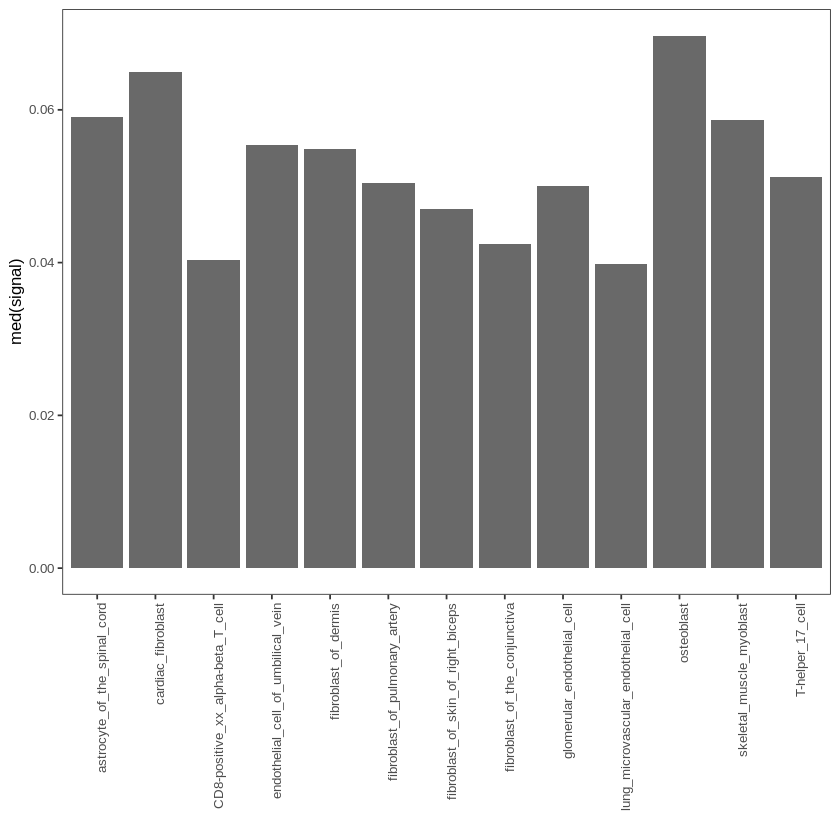

In [14]:
exampleCellMatrixFile = system.file("extdata", "example_cell_matrix.txt", package="GenomicDistributions")
cellMatrix = data.table::fread(exampleCellMatrixFile)
op = calcSummarySignal(query, cellMatrix)
plotSummarySignal(op)

In [15]:
cellMatrix

V1,astrocyte_of_the_spinal_cord,cardiac_fibroblast,CD8-positive_xx_alpha-beta_T_cell,endothelial_cell_of_umbilical_vein,fibroblast_of_dermis,fibroblast_of_pulmonary_artery,fibroblast_of_skin_of_right_biceps,fibroblast_of_the_conjunctiva,glomerular_endothelial_cell,lung_microvascular_endothelial_cell,osteoblast,skeletal_muscle_myoblast,T-helper_17_cell
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_8130458_8130903,0.1270,0.0937,0.0550,0.0309,0.0315,0.0520,0.0735,0.0662,0.0680,0.0320,0.0190,0.1183,0.1115
chr1_8131775_8131925,0.0508,0.0321,0.0683,0.0563,0.0482,0.0452,0.0072,0.0286,0.0260,0.0217,0.0378,0.0239,0.0903
chr1_10732275_10732425,0.0236,0.0183,0.0560,0.2383,0.0165,0.0194,0.0128,0.0074,0.0263,0.2841,0.4417,0.0120,0.0159
chr1_10732475_10732645,0.0045,0.0090,0.0406,0.2067,0.0177,0.0295,0.0192,0.0073,0.0479,0.1875,0.4553,0.0096,0.0103
chr1_10852095_10852245,0.0338,0.0416,0.0397,0.0532,0.0102,0.0587,0.0197,0.0314,0.0718,0.0542,1.0000,0.0308,0.0485
chr1_10925155_10925365,0.0424,0.0181,0.0410,0.0460,0.0405,0.0263,0.0338,0.0392,0.0129,0.0063,0.0900,0.0172,0.0091
chr1_10965595_10965785,0.0606,0.0254,0.0442,0.0111,0.0387,0.0235,0.0116,0.0025,0.0042,0.0277,0.1390,0.0299,0.0703
chr1_33722335_33723625,0.5422,0.2490,0.6172,0.4543,0.1972,0.3181,0.2779,0.3422,0.2329,0.2895,0.8480,0.1536,0.4351
chr1_33723635_33723908,0.0713,0.1258,0.1728,0.1867,0.1114,0.1013,0.0818,0.1358,0.0414,0.1763,0.8794,0.1207,0.0203


## GC content plots

In [17]:
# Calculate the GC content
gc1 = calcGCContentRef(query, "hg38")

Loading required namespace: BSgenome.Hsapiens.UCSC.hg38.masked

Warning message in .requireAndReturn(databasePkgString):
“BSgenome.Hsapiens.UCSC.hg38.masked is not installed”


ERROR: Error in .validateInputs(list(query = c("GRanges", "GRangesList"), ref = "BSgenome")): ref must be a BSgenome.  Got: NULL


In [18]:
df1 = calcDinuclFreqRef(query, "hg19")
plotDinuclFreq(df1)

Loading required namespace: BSgenome.Hsapiens.UCSC.hg19.masked

Warning message in .requireAndReturn(databasePkgString):
“BSgenome.Hsapiens.UCSC.hg19.masked is not installed”


ERROR: Error in .validateInputs(list(query = c("GRanges", "GRangesList"), ref = "BSgenome")): ref must be a BSgenome.  Got: NULL
